In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.23.5
pandas version :  1.5.3
seaborn version :  0.12.2


In [ ]:
data = pd.read_csv('train.csv')
data.shape

(37960, 12)

In [ ]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2,Male,76.0,1.0,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,3,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,4,Male,21.0,1.0,11.0,1.0,< 1 Year,No,28619.0,152.0,203.0,0.0
4,5,Female,29.0,1.0,41.0,1.0,< 1 Year,No,27496.0,152.0,39.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37960 entries, 0 to 37959
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    37960 non-null  int64  
 1   Gender                37959 non-null  object 
 2   Age                   37959 non-null  float64
 3   Driving_License       37959 non-null  float64
 4   Region_Code           37959 non-null  float64
 5   Previously_Insured    37959 non-null  float64
 6   Vehicle_Age           37959 non-null  object 
 7   Vehicle_Damage        37959 non-null  object 
 8   Annual_Premium        37959 non-null  float64
 9   Policy_Sales_Channel  37959 non-null  float64
 10  Vintage               37959 non-null  float64
 11  Response              37959 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 3.5+ MB


In [ ]:
nums = ['Age','Annual_Premium','Vintage','Driving_License','Region_Code','Previously_Insured','Policy_Sales_Channel','Response',]
cats = ['Gender','Vehicle_Age','Vehicle_Damage',]

In [ ]:
data[cats].describe()

,Gender,Vehicle_Age,Vehicle_Damage
count,37959,37959,37959
unique,2,3,2
top,Male,1-2 Year,Yes
freq,20470,19827,19151


In [ ]:
data[nums].describe()

,Age,Annual_Premium,Vintage,Driving_License,Region_Code,Previously_Insured,Policy_Sales_Channel,Response
count,37959.000000,37959.000000,37959.000000,37959.000000,37959.000000,37959.000000,37959.000000,37959.000000
mean,38.773440,30563.669538,154.090835,0.997892,26.453990,0.456993,112.569430,0.121763
std,15.540311,17051.398032,83.574081,0.045860,13.168572,0.498154,53.935742,0.327016
min,20.000000,2630.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,25.000000,24384.500000,82.000000,1.000000,15.000000,0.000000,30.000000,0.000000
50%,36.000000,31746.000000,154.000000,1.000000,28.000000,0.000000,151.000000,0.000000
75%,49.000000,39518.500000,227.000000,1.000000,35.000000,1.000000,152.000000,0.000000
max,84.000000,508073.000000,299.000000,1.000000,52.000000,1.000000,163.000000,1.000000


In [ ]:
data.corr()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,-0.002688,0.002309,0.000786,0.019422,-0.007639,0.000777,-0.010529,-0.008388
Age,-0.002688,1.000000,-0.080553,0.037958,-0.255385,0.078599,-0.578117,0.002181,0.109477
Driving_License,0.002309,-0.080553,1.000000,-0.005744,0.013330,-0.008855,0.036272,-0.002129,0.008328
Region_Code,0.000786,0.037958,-0.005744,1.000000,-0.030503,-0.005856,-0.038007,-0.008520,0.011567
Previously_Insured,0.019422,-0.255385,0.013330,-0.030503,1.000000,0.002939,0.221776,0.003298,-0.337869
Annual_Premium,-0.007639,0.078599,-0.008855,-0.005856,0.002939,1.000000,-0.118548,-0.000168,0.034655
Policy_Sales_Channel,0.000777,-0.578117,0.036272,-0.038007,0.221776,-0.118548,1.000000,-0.000525,-0.146692
Vintage,-0.010529,0.002181,-0.002129,-0.008520,0.003298,-0.000168,-0.000525,1.000000,-0.002433
Response,-0.008388,0.109477,0.008328,0.011567,-0.337869,0.034655,-0.146692,-0.002433,1.000000


<Axes: >

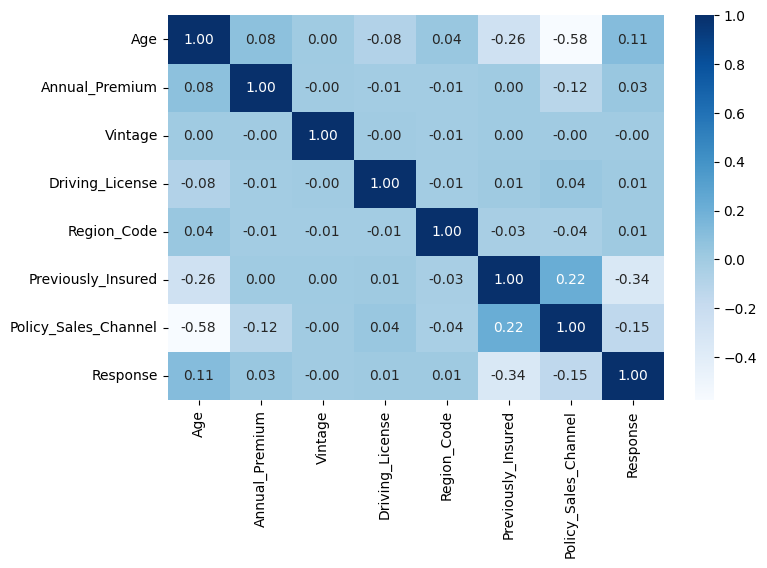

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(data[nums].corr(), cmap='Blues', annot=True, fmt='.2f')

<Figure size 200x200 with 0 Axes>

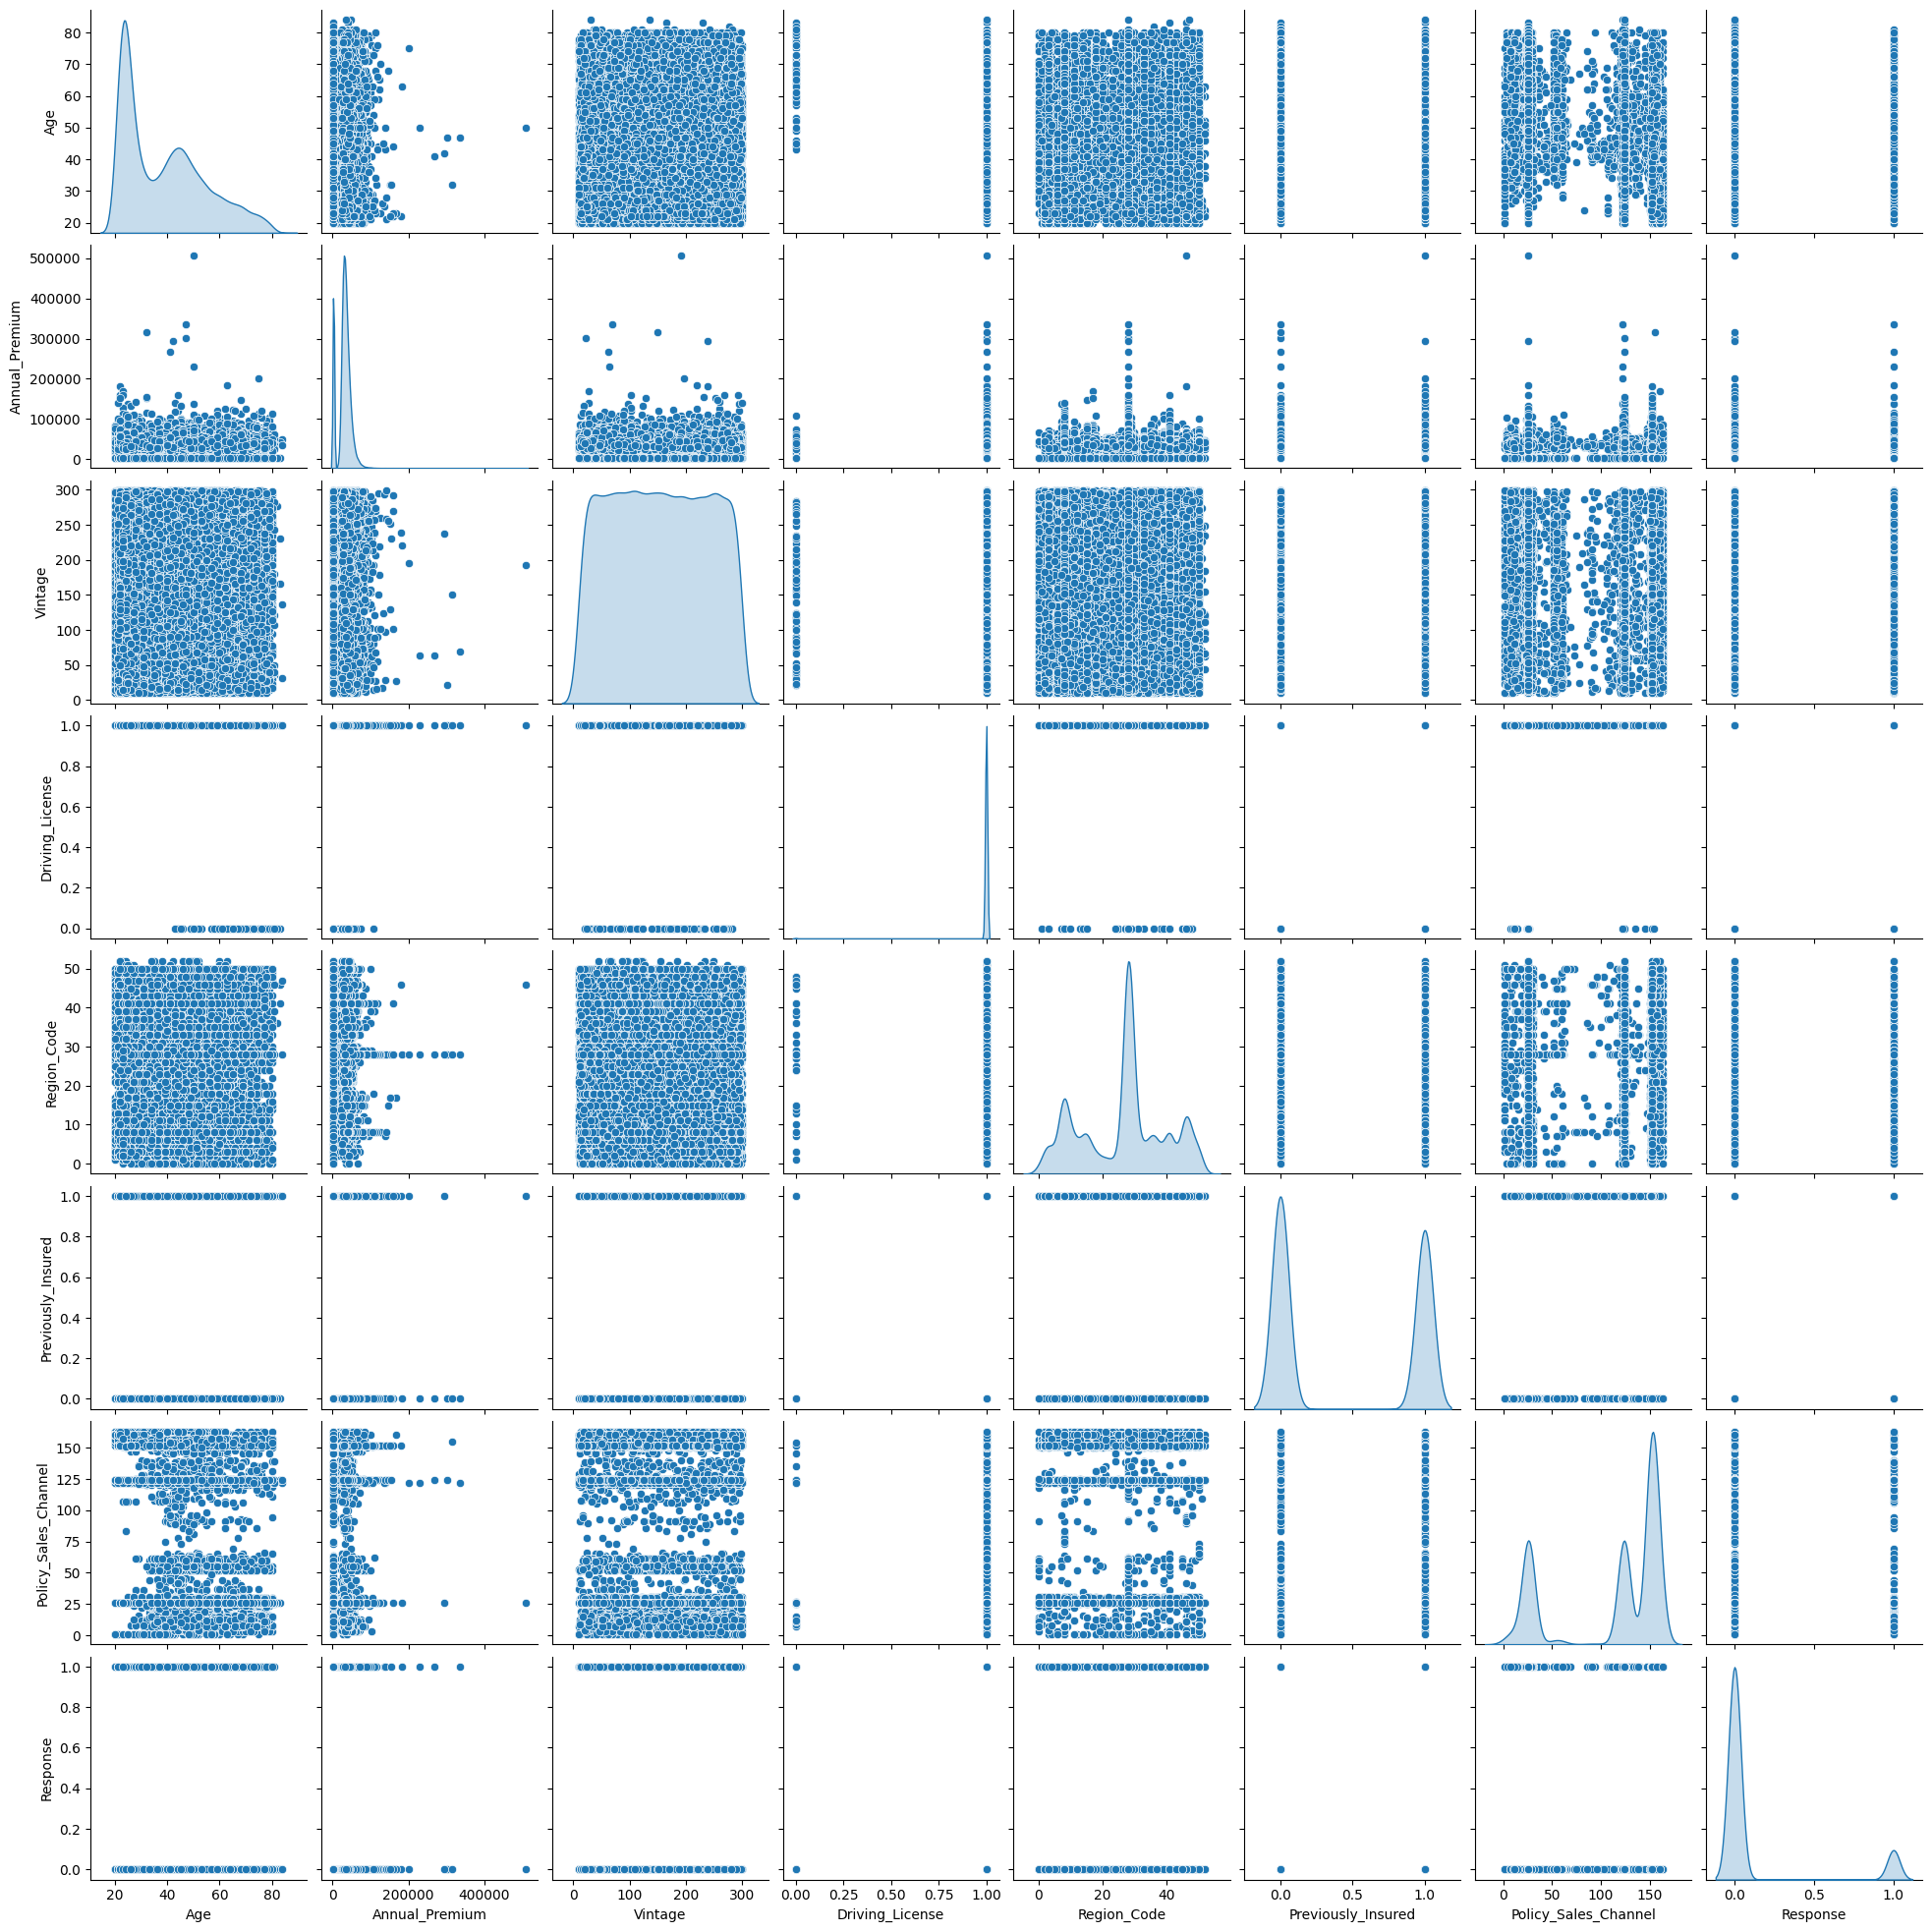

In [ ]:
plt.figure(figsize=(2, 2))
sns.pairplot(data[nums], diag_kind='kde')

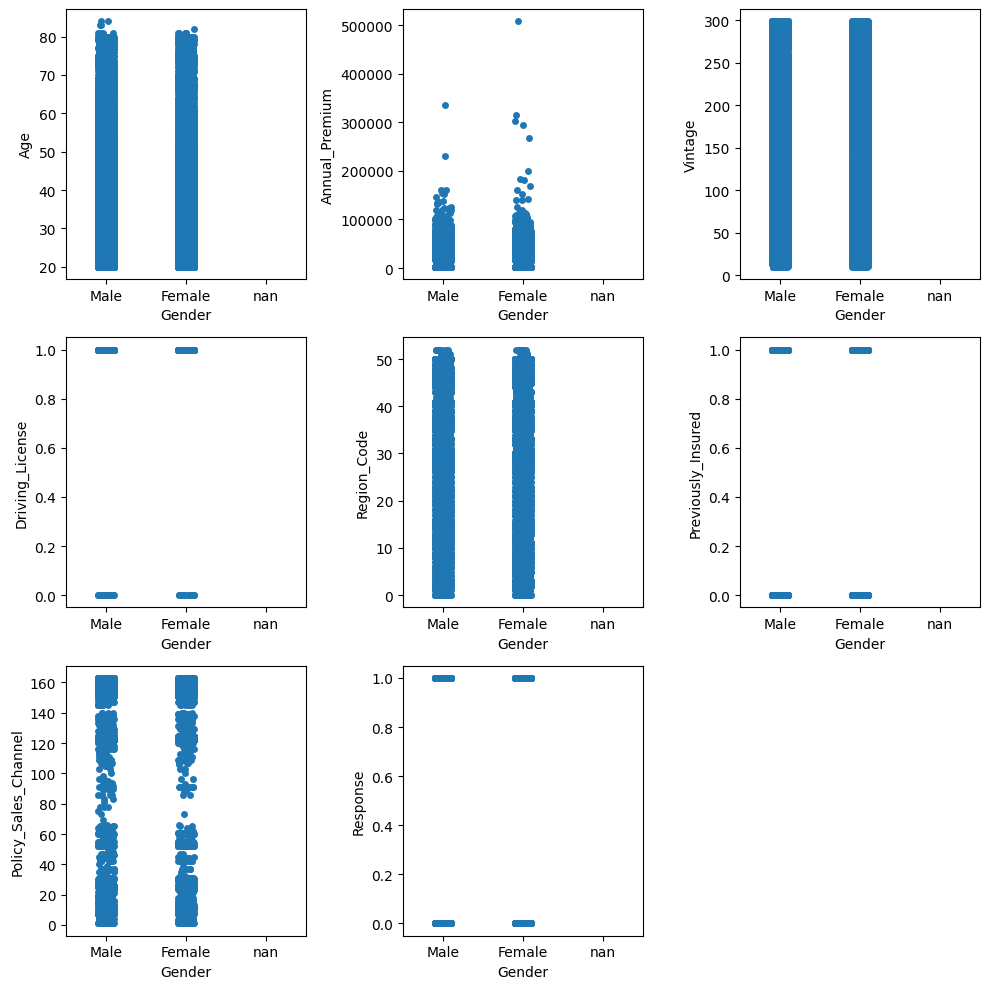

In [ ]:
fig = plt.figure(figsize=(10, 10))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=data, x="Gender", y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

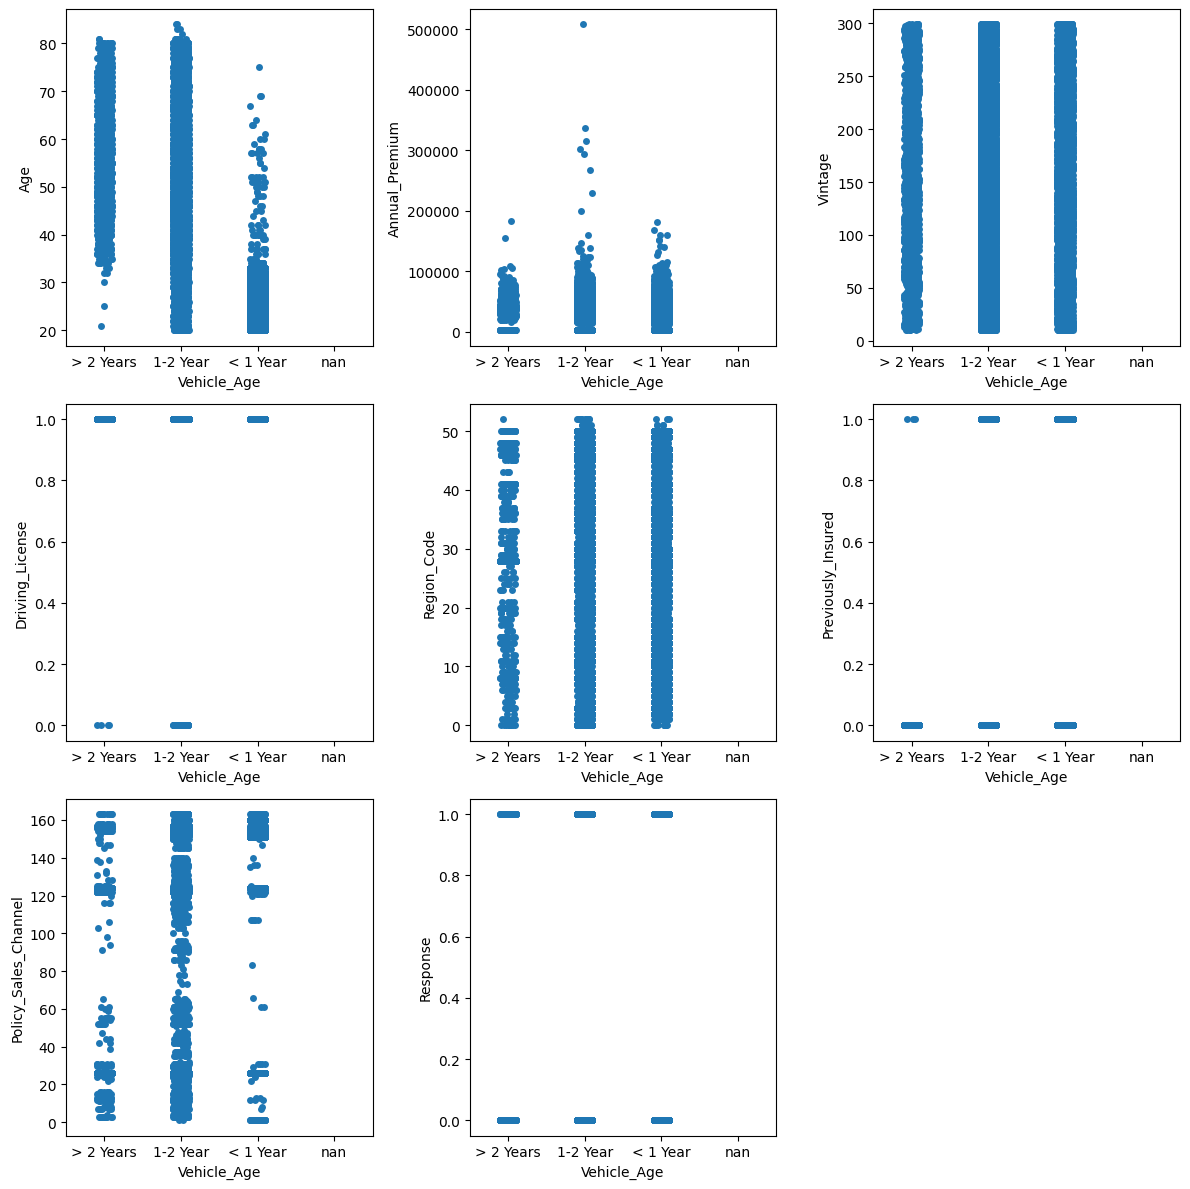

In [ ]:
fig = plt.figure(figsize=(12, 12))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=data, x='Vehicle_Age', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

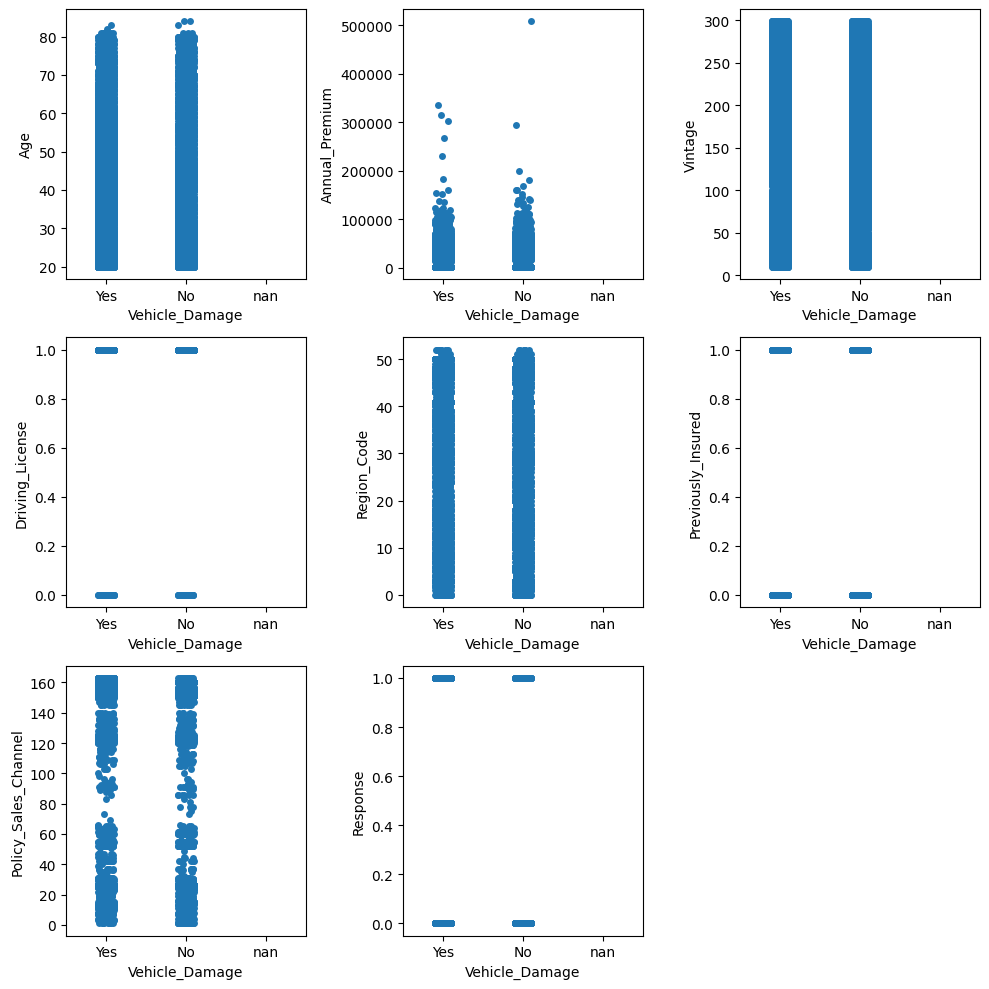

In [ ]:
fig = plt.figure(figsize=(10, 10))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=data, x='Vehicle_Damage', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

In [ ]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['Age'], df['Annual_Premium'], c=df['Response'], cmap='viridis', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Annual Premium')
plt.title('Age vs Annual Premium (Color Encoded by Response)')
plt.colorbar(scatter, label='Response')
plt.show()